In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


%matplotlib inline

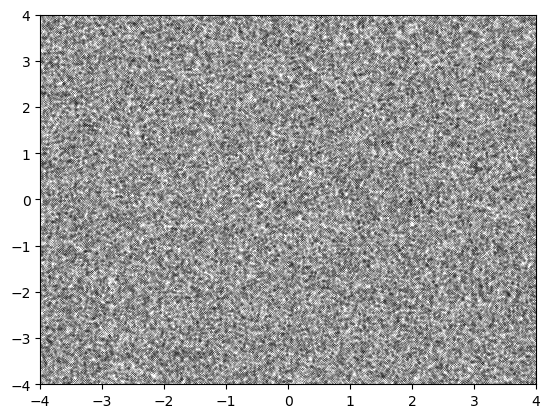

In [2]:
zix = np.random.uniform(low = -4, high = 4, size = 150000)
ziy = np.random.uniform(low = -4, high = 4,size = 150000)


                 

plt.scatter(zix, ziy, color = 'black', s = 0.01)
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.show()



In [3]:
## zi ==> posição inicial
# zf ==> poisição final dps da deflexão

e1 = 0.5     #=> fração da massa 
r1x = -0.75    #=> posição da lente j em relação a origem
r1y = 0
e2 = 0.5     #=> fração da massa 
r2x = 0.75
r2y = 0

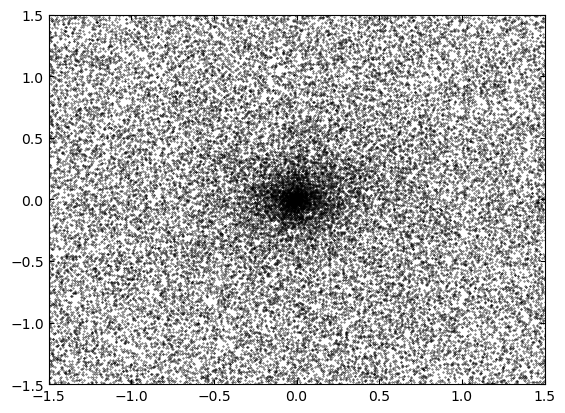

In [4]:
r1x = 0


zfx = zix - (e1/np.sqrt((zix-r1x)**2 + (ziy-r1y)**2))*(zix - r1x)
zfy = ziy - (e1/np.sqrt((zix-r1x)**2 + (ziy-r1y)**2))*(ziy - r1y)

plt.tick_params(direction='in', which = 'both', bottom = 1, top =1, left = 1, right = 1)
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)
plt.scatter(zfx, zfy, color = 'black', s = 0.1)


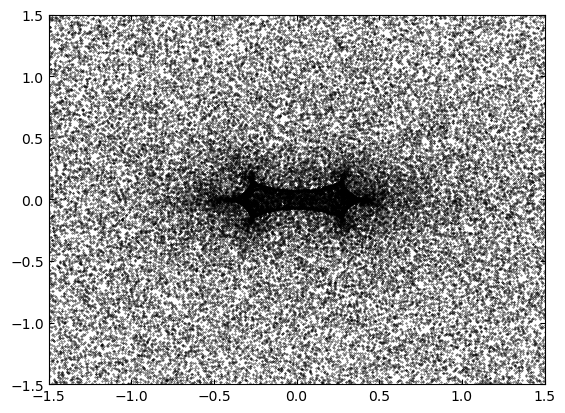

In [5]:
e1 = 0.5     #=> fração da massa 
r1x = -0.75    #=> posição da lente j em relação a origem
r1y = 0
e2 = 0.5     #=> fração da massa 
r2x = 0.75
r2y = 0

zfx = zix - (e1/np.sqrt((zix-r1x)**2 + (ziy-r1y)**2))*(zix - r1x) - (e2/np.sqrt((zix-r2x)**2 + (ziy-r2y)**2))*(zix - r2x)
zfy = ziy - (e1/np.sqrt((zix-r1x)**2 + (ziy-r1y)**2))*(ziy - r1y)- (e2/np.sqrt((zix-r2x)**2 + (ziy-r2y)**2))*(ziy - r2y)

plt.tick_params(direction='in', which = 'both', bottom = 1, top =1, left = 1, right = 1)
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)

plt.scatter(zfx, zfy, color = 'black', s = 0.1)


In [6]:
## Para o mapa de magnificação, preciso de mais pontos
zix = np.random.uniform(low = -2, high = 2, size = 1500000)
ziy = np.random.uniform(low = -2, high = 2,size = 1500000)


## Duas lentes
zfx = zix - (e1/np.sqrt((zix-r1x)**2 + (ziy-r1y)**2))*(zix - r1x) - (e2/np.sqrt((zix-r2x)**2 + (ziy-r2y)**2))*(zix - r2x)
zfy = ziy - (e1/np.sqrt((zix-r1x)**2 + (ziy-r1y)**2))*(ziy - r1y)- (e2/np.sqrt((zix-r2x)**2 + (ziy-r2y)**2))*(ziy - r2y)

(array([[2., 1., 0., ..., 1., 1., 4.],
        [1., 2., 0., ..., 0., 2., 3.],
        [1., 1., 2., ..., 2., 1., 1.],
        ...,
        [3., 0., 0., ..., 0., 1., 0.],
        [0., 1., 1., ..., 0., 0., 1.],
        [3., 1., 1., ..., 1., 1., 2.]]),
 array([-1.32939247, -1.32673291, -1.32407334, ...,  1.32485387,
         1.32751343,  1.330173  ]),
 array([-1.2790193 , -1.27645877, -1.27389824, ...,  1.27638886,
         1.27894939,  1.28150992]),
 <matplotlib.collections.QuadMesh at 0x153776201d0>)

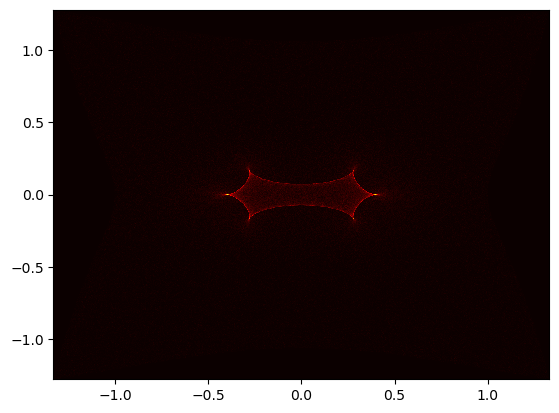

In [7]:
##Mapa de magnificação
plt.hist2d(zfx, zfy, 
           bins = 1000,  
           cmap ="hot")

           #cmin = 0.5)

In [8]:
grid_size = 0.01
x_edges = np.arange(-1.5, 1.5, grid_size)
y_edges = np.arange(-1.5, 1.5, grid_size)

hist, xedges, yedges = np.histogram2d(zfx, zfy, bins=[x_edges, y_edges])

# Calculate bin width and height
bin_width = x_edges[1] - x_edges[0]
bin_height = y_edges[1] - y_edges[0]


In [9]:
passo = 1000
alpha = 0.8
inter = 0
b = inter/np.cos(alpha)

xp = np.linspace(-1.5, 1.5, passo)
yp = np.tan(alpha)*xp + b

In [10]:
density = []

for i in range(0,passo):
    point_x = xp[i]
    point_y = yp[i]

    x_bin = np.digitize(point_x, x_edges) - 1
    y_bin = np.digitize(point_y, y_edges) - 1

    x_bin = min(max(x_bin, 0), hist.shape[0] - 1)
    y_bin = min(max(y_bin, 0), hist.shape[1] - 1)

    num_points_in_bin = hist[x_bin, y_bin]

    density_1 = num_points_in_bin / (bin_width * bin_height)
    density.append(density_1)
    

In [11]:
# Define a moving average kernel
window_size = 5
kernel = np.ones(window_size) / window_size

# Perform convolution to smooth the data
density_smooth = np.convolve(density, kernel, mode='same')

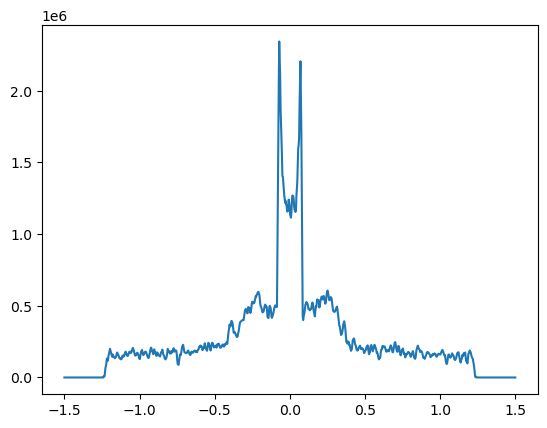

In [12]:
#plt.plot(xp, density)
plt.plot(xp, density_smooth)

Text(0, 0.5, 'Y')

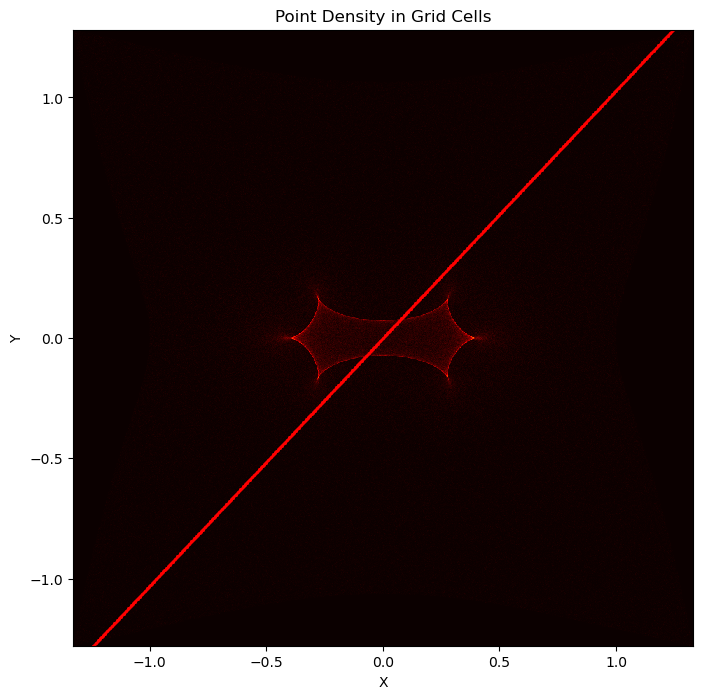

In [13]:
# Plot the histogram and the point
plt.figure(figsize=(8, 8))
#plt.imshow(hist.T, origin='lower', cmap='viridis', interpolation='nearest', alpha=0.5)
plt.hist2d(zfx, zfy, 
           bins = 1000,  
           cmap ="hot")
plt.scatter(xp, yp, c='red', marker='.', s=5)
plt.title('Point Density in Grid Cells')
plt.xlabel('X')
plt.ylabel('Y')


### Com a distribuição de arquimendes

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def arquimedes(num_points):
    
    # Definindo o ângulo de ouro
    golden_angle = np.pi * (3 - np.sqrt(5))
    
    # Cálculo dos ângulos usando o ângulo de ouro
    theta = golden_angle * np.arange(num_points)
    
    # Raio
    r = np.sqrt(theta)
    
    # Coordenadas
    x = r * np.cos(theta)/(num_points/1000)
    y = r * np.sin(theta)/(num_points/1000)

    return x, y


In [29]:
## definição de raio de einsten
## re = sqrt(2* Rs * (Dl/Ds)*(Ds - Dl))

radius = 1


theta = np.linspace(0, 2 * np.pi, 1000)

x_circle = radius * np.cos(theta)
y_circle = radius * np.sin(theta)




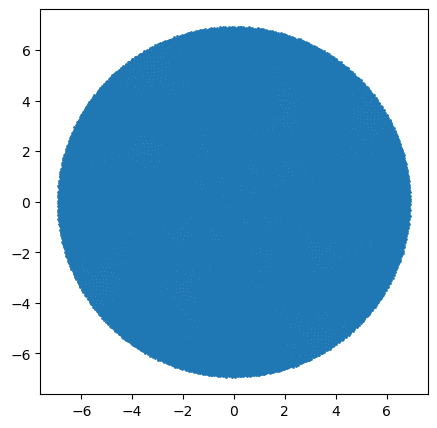

In [16]:
x, y = arquimedes(50000)
plt.figure(figsize=(5, 5))
plt.scatter(x,y, s = 1)

In [17]:
def cart(zix, ziy, r1, r2, e):
    e1 = e[0]     #=> fração da massa 
    r1x = r1[0]    #=> posição da lente j em relação a origem
    r1y = r1[1]
    e2 = e[1]     #=> fração da massa 
    r2x = r2[0]
    r2y = r2[1]


    zfx = zix - (e1/np.sqrt((zix-r1x)**2 + (ziy-r1y)**2))*(zix - r1x) - (e2/np.sqrt((zix-r2x)**2 + (ziy-r2y)**2))*(zix - r2x)
    zfy = ziy - (e1/np.sqrt((zix-r1x)**2 + (ziy-r1y)**2))*(ziy - r1y)- (e2/np.sqrt((zix-r2x)**2 + (ziy-r2y)**2))*(ziy - r2y)
    return zfx, zfy


In [18]:
e = [0.5,0.5] # -> fração da massa
r1 = [-0.75, 0] # -> posição das lentes
r2 = [0.75, 0]

zix, ziy = arquimedes(500000)

x1, y1 = cart(zix, ziy, r1, r2, e)


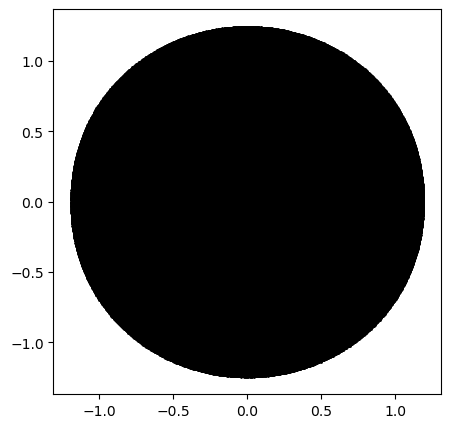

In [19]:
plt.figure(figsize=(5, 5))
plt.scatter(x1, y1, s = 1, c = 'black')
#plt.xlim(-1.5, 1.5)}
#plt.ylim(-1.5,1.5)

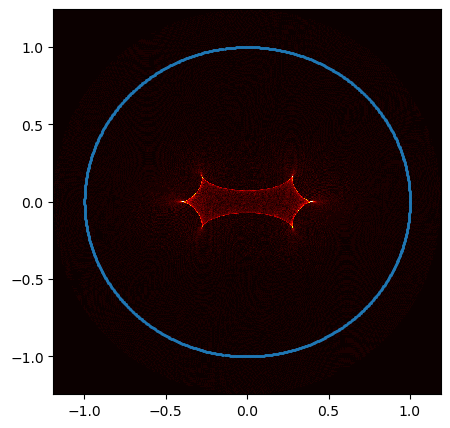

In [30]:
plt.figure(figsize=(5, 5))
plt.hist2d(x1, y1, bins = 1000,  cmap ="hot")
plt.scatter(xp, yp, s = 0.5, c = 'red')
plt.scatter(x_circle, y_circle, s = 2)
#plt.scatter(xp, yp, s = 1, c = 'red')



In [21]:
grid_size = 0.01
x_edges = np.arange(-1.5, 1.5, grid_size)
y_edges = np.arange(-1.5, 1.5, grid_size)

hist, xedges, yedges = np.histogram2d(x1, y1, bins=[x_edges, y_edges])

# Calculate bin width and height
bin_width = x_edges[1] - x_edges[0]
bin_height = y_edges[1] - y_edges[0]

In [22]:
passo = 1000
alpha = 0.8
inter = 0
b = inter/np.cos(alpha)

xp = np.linspace(-1.5, 1.5, passo)
yp = np.tan(alpha)*xp + b


(-1.5, 1.5)

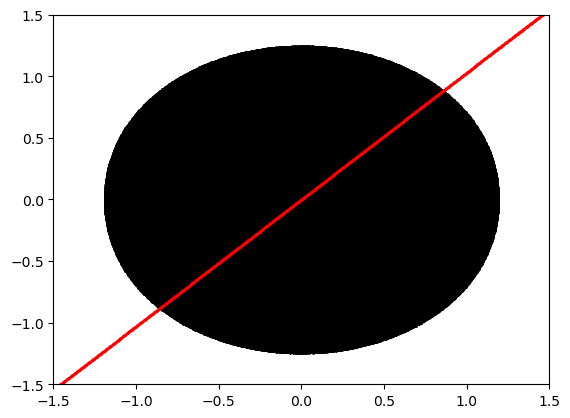

In [23]:
plt.scatter(x1, y1, s = 1, c = 'black')
plt.scatter(xp, yp, s = 1, c = 'red')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5,1.5)

In [24]:
density = []

for i in range(0,passo):
    point_x = xp[i]
    point_y = yp[i]

    x_bin = np.digitize(point_x, x_edges) - 1
    y_bin = np.digitize(point_y, y_edges) - 1

    x_bin = min(max(x_bin, 0), hist.shape[0] - 1)
    y_bin = min(max(y_bin, 0), hist.shape[1] - 1)

    num_points_in_bin = hist[x_bin, y_bin]

    density_1 = num_points_in_bin / (bin_width * bin_height)
    density.append(density_1)
   


In [25]:
# Define a moving average kernel
window_size = 5
kernel = np.ones(window_size) / window_size

# Perform convolution to smooth the data
density_smooth = np.convolve(density, kernel, mode='same')

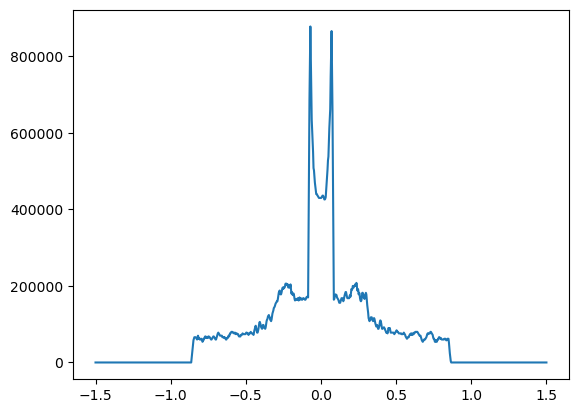

In [26]:
plt.plot(xp, density_smooth)
plt.ylabel("Count")
plt.xlabel("x")

## magnificação usando monte carlo (?) (+ ou -)

In [52]:
## x1 e y1 já complexos
## zix e ziy
def distance(a, b):
    x1,y1 = a
    x2, y2 = b
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)


def mag(c, p):
    count = 0
    for i in range(0,len(p)):
       
       dist = distance(c, p[i])
       if abs(dist) <= 1: ## re = 1
            count += 1

    return count

In [28]:
xy_zip = zip(x1, y1)
list_xy = list(xy_zip)

In [31]:
zz_zip = zip(zix,ziy)
list_zz = list(zz_zip)

In [53]:
c = [0.0, 0.0]
teste = mag(c, list_xy)

In [55]:
teste_2 = mag(c, list_zz)
teste_2

104169

In [59]:
mag_total = (teste - teste_2)/teste_2

mag_total

2.844349086580461